In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def rgb_to_mono(img, t):
    mono_img = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            mono_img[i][j] = sum(img[i][j]) / (255. * 3.) < t
    return mono_img

In [3]:
def mono_to_ts(img):
    y = np.zeros((img.shape[0]))
    x = np.zeros((img.shape[1]))
    for i in range(img.shape[0]):
        y[i] = img.sum(axis=0)[i]
    for i in range(img.shape[1]):
        x[i] = img.sum(axis=1)[i]
    return x, y

In [4]:
def smooth( data , windowLength = 3  ) :  
    window = [] 
    newData = [] 
    for i in data :
        if len(window) < windowLength: 
            window += [i] 
        else: 
            window = window[1:] 
            window += [i] 
        newData += [np.mean(window)] 
    return np.array(newData)

In [17]:
def normalize(rawData) : 
    mean = np.mean(rawData) 
    sd   = np.std(rawData)
    normFunction = lambda q: (q - mean) / sd 
    normData = normFunction(rawData)
    return normData

In [18]:
def plotGraph(seriesList) : 
    for series in seriesList : 
        plt.plot(series) 
    plt.show()

In [23]:
def char_to_ts(img):
    d = np.asarray(img)
    d = rgb_to_mono(d, 0.5)
    x, y = mono_to_ts(d)
    x = normalize(x)
    y = normalize(y)
    x = smooth(x, 10)
    y = smooth(y, 10)
    return x, y

In [24]:
a = Image.open('data/a.jpg')
b = Image.open('data/b.jpg')

In [25]:
a_x, a_y = char_to_ts(a)
b_x, b_y = char_to_ts(b)

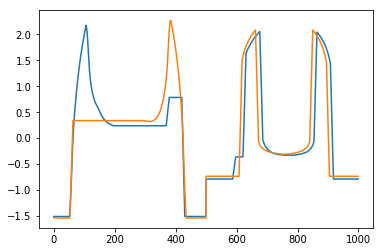

In [28]:
plotGraph([np.concatenate([a_x, a_y]), np.concatenate([b_x, b_y])])